In [1]:
# Standard libraries
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interactive, IntProgress
from IPython.display import display

# Append base directory
import os,sys,inspect
rootname = "pub-2020-exploratory-analysis"
thispath = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
rootpath = os.path.join(thispath[:thispath.index(rootname)], rootname)
sys.path.append(rootpath)
print("Appended root directory", rootpath)

from mesostat.utils.qt_helper import gui_fnames, gui_fpath
from lib.gallegosalas.data_fc_db_sessional import DataFCDatabase
from mesostat.metric.metric import MetricCalculator
from mesostat.utils.signals import zscore

%load_ext autoreload
%autoreload 2

Appended root directory /home/alyosha/work/git/pub-2020-exploratory-analysis


In [2]:
params = {}
# params['root_path_data']  = gui_fpath("Path to data collection",  './')
params['root_path_data'] = '/media/alyosha/Data/TE_data/yasirdata2/'

In [3]:
dataDB = DataFCDatabase(params)

Reading channel label file
Reading allen brain map
Reading task structure
Searching for data files


In [4]:
dataDB.read_neuro_files()

IntProgress(value=0, description='Read Neuro Data:', max=42)

In [5]:
print('nSession', len(dataDB.dataNeuronal))
print('nChannel', dataDB.dataNeuronal[0].shape[1])

nSession 42
nChannel 27


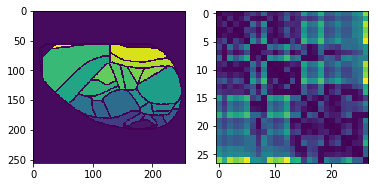

29

In [6]:
dataDB.calc_shortest_distances()

fig, ax = plt.subplots(ncols=2)
ax[0].imshow(dataDB.allenMap)
ax[1].imshow(dataDB.allenDist)
plt.show()

len(dataDB.allenCounts)

In [7]:
dataDB.performanceDPDict

{'20180301a': 2.2753021381440792,
 '20180301b': 2.1341424619862273,
 '20180302b': 1.6945346933192396,
 '20180302c': 1.6653360522285778,
 '20180305a': 1.8797532579291083,
 '20180305b': 1.5715551331127793,
 '20180306a': 2.3713199572577093,
 '20180306b': 2.5961218566555018,
 '20180307a': 1.9761721241485524,
 '20180307b': 2.68654725171221,
 '20180307c': 2.5388843555192464,
 '20180308a': 1.9949031915614628,
 '20180308b': 2.099887409905324,
 '20180309a': 2.19457577754589,
 '20180309b': 1.9364775582367273,
 '20180313a': 1.932135046027403,
 '20180313b': 1.604625880732903,
 '20180313c': 1.9141520332563158,
 '20180315a': 1.677160168146597,
 '20180316a': 2.3104124933603893,
 '20180316b': 3.067163180664534}

In [8]:
display(list(dataDB.channelLabels))

['A1',
 'S2',
 'TEA',
 'AD',
 'AP',
 'PR',
 'NO',
 'BC',
 'MO',
 'LI',
 'AL',
 'PL',
 'RL',
 'V1',
 'M1',
 'UN',
 'FL',
 'M2',
 'A',
 'TR',
 'AM',
 'PM',
 'RA',
 'RD',
 'BC',
 'BC',
 'BC',
 'ACC']

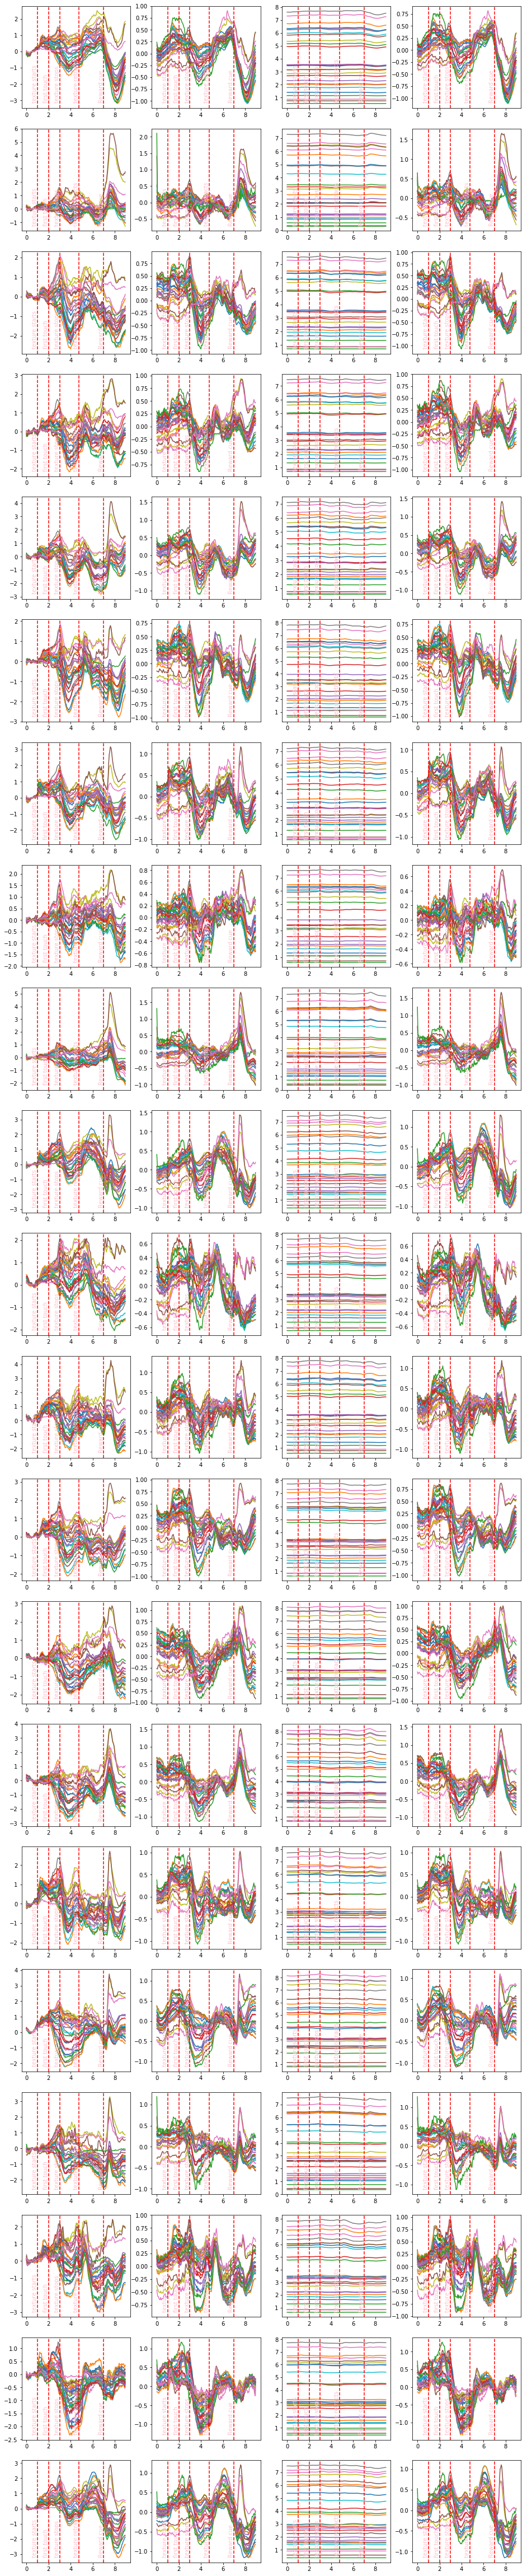

In [12]:
nRows = len(dataDB.sessions)
nCols = 2 * len(dataDB.mice)

fig, ax = plt.subplots(nrows=nRows, ncols=nCols, figsize=(4*nCols, 4*nRows))
for iMouse, mousename in enumerate(dataDB.mice):
    for iSession, session in enumerate(dataDB.sessions):
        mouseRows = dataDB.get_rows('neuro', {'mousename' : mousename, 'session' : session})
        
        for iAllen, (idx, row) in enumerate(mouseRows.iterrows()):
            times = dataDB.get_times_by_idx(idx)
            data = np.copy(dataDB.dataNeuronal[idx])
            if 'abs' in mousename:
                data /= dataDB.allenCounts[iAllen]
            
            dataZscored = zscore(data, axis=(0, 2))
            
            ax[iSession, 2*iMouse].plot(times, np.mean(data, axis=0).T)
            ax[iSession, 2*iMouse+1].plot(times, np.mean(dataZscored, axis=0).T)
            
            dataDB.label_plot_timestamps(ax[iSession, 2*iMouse], linecolor='r', textcolor='pink')
            dataDB.label_plot_timestamps(ax[iSession, 2*iMouse+1], linecolor='r', textcolor='pink')
        
plt.show()